# Bagging meta-estimator is an ensembling algorithm that can be used for both classification (BaggingClassifier) and regression (BaggingRegressor) problems. It follows the typical bagging technique to make predictions. Following are the steps for the bagging meta-estimator algorithm:

## 1. Random subsets are created from the original dataset (Bootstrapping).
## 2. The subset of the dataset includes all features.
## 3. A user-specified base estimator is fitted on each of these smaller sets.
## 4. Predictions from each model are combined to get the final result.

In [1]:
# Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [2]:
train=pd.read_csv('C:\\Punit\\Innovation\\BID\\Data-Sets\\churnFiltered-v.csv')

In [3]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15609562,MacDonald,774,Spain,Female,43,1,116360.07,1,1,0,17004.14,0
1,15578096,Nnachetam,537,France,Male,26,7,106397.75,1,0,0,103563.23,0
2,15674928,Mullah,850,Spain,Male,37,2,0.00,2,1,0,119969.99,0
3,15765322,Connely,755,France,Male,23,5,84284.48,2,1,1,62851.60,0
4,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0


In [4]:
train.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
train.shape

(5000, 13)

In [7]:
# converting gender to 0 and 1 
# drop non numeric columns 

Gender=pd.get_dummies(train['Gender'],drop_first=True)
train=pd.concat([train,Gender], axis=1)

train.drop(['Surname','Geography','Gender'], axis=1, inplace=True)

In [8]:
train.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,15609562,774,43,1,116360.07,1,1,0,17004.14,0,0
1,15578096,537,26,7,106397.75,1,0,0,103563.23,0,1
2,15674928,850,37,2,0.00,2,1,0,119969.99,0,1
3,15765322,755,23,5,84284.48,2,1,1,62851.60,0,1
4,15647572,504,34,0,54980.81,1,1,1,136909.88,0,1


In [9]:
# split data into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), 
                                                    train['Exited'], test_size=0.2, 
                                                    random_state=101)

In [10]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1),
                         n_estimators=500,
                         max_samples=200,
                         max_features=5,
                         n_jobs=-1)

In [11]:
model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [12]:
pred = model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
print(accuracy_score(pred,y_test))

0.816


In [21]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       963
           1       0.16      0.95      0.28        37

    accuracy                           0.82      1000
   macro avg       0.58      0.88      0.59      1000
weighted avg       0.97      0.82      0.87      1000



In [22]:
print(confusion_matrix(pred,y_test))

[[781 182]
 [  2  35]]


In [23]:
y_test.value_counts()

0    783
1    217
Name: Exited, dtype: int64

In [27]:
pd.Series(pred).value_counts()

0    963
1     37
dtype: int64

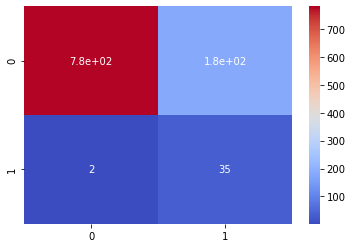

In [17]:
sns.heatmap(confusion_matrix(pred,y_test),cmap='coolwarm',annot=True)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
new_model = BaggingClassifier(RandomForestClassifier(random_state=101),
                         n_estimators=500,
                         max_features=5,
                         n_jobs=-1)

In [31]:
new_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators='warn',
                                                        n_jobs=None,
    

In [32]:
new_pred = new_model.predict(X_test)

In [35]:
print(accuracy_score(new_pred,y_test))

0.829


In [36]:
print(classification_report(new_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       952
           1       0.22      0.98      0.35        48

    accuracy                           0.83      1000
   macro avg       0.61      0.90      0.63      1000
weighted avg       0.96      0.83      0.88      1000



In [39]:
new_model.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=1290508681,
                        verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=594006790,
                        verbose=0, warm_start=F